### Predict if passenger is survived or not
#### Data Processing 

In [2]:
# You can install any of the libraries as shown below
# !pip install -U scikit-learn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Exploring the Titanic data

In [3]:
data=pd.read_csv('titanic_train.csv')
data.head()
#Pclass= the calss that the passenger travel in 1st, 2nd, 3rd
#SibSp=number of sibling or spuse travel with the passenger
#Parch=number of chlidren traverl with the passenger
#Embarked=the city that the passenger join the trip(S-Southampton,UK , C-Cherbourg,Fr , Q-Queenstown,New Zealand)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.shape

(891, 12)

In [5]:
# remove any unuseful columns
data.drop(['PassengerId','Name','Ticket','Cabin'],'columns',inplace=True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [6]:
# find and count the nulls for each column
data[data.isnull().any(axis=1)].count()
# the total of rows is 891 and 179 rows contain null values

Survived    179
Pclass      179
Sex         179
Age           2
SibSp       179
Parch       179
Fare        179
Embarked    177
dtype: int64

In [7]:
# other way to show the null count 
data.isnull().sum() 

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [8]:
data.info()
#Total rows contien nulls are 179
#we can see here Age column has 177 nulls (891-714=177) and 2 rows in Emparked column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [9]:
# will drop all null values 
data=data.dropna()

In [10]:
data.shape

(712, 8)

In [11]:
# count the nulls again to make sure
data[data.isnull().any(axis=1)].count()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [12]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [13]:
# crosstab is good way to see relationship between variables
pd.crosstab(data['Sex'],data['Survived'])
# we can see very clear that there is high priority for women are given prefrence on life boats 

Survived,0,1
Sex,,
female,64,195
male,360,93


In [14]:
pd.crosstab(data['Pclass'],data['Survived'])
# we can see very clear that the first class passengers are given prefrence on life boats 

Survived,0,1
Pclass,,
1,64,120
2,90,83
3,270,85


In [15]:
# there is better way to find relationship between variables which is finding the correlation
# the correlation is a number between -1 and 1 indecate the relation between two variables
data_corr=data.corr()
data_corr
# it is hard to find out which variables are related to each other, so we need to use the heatmap plot 

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.356462,-0.082446,-0.015523,0.095265,0.266100
Pclass,-0.356462,1.000000,-0.365902,0.065187,0.023666,-0.552893
Age,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143
SibSp,-0.015523,0.065187,-0.307351,1.000000,0.383338,0.139860
Parch,0.095265,0.023666,-0.187896,0.383338,1.000000,0.206624
Fare,0.266100,-0.552893,0.093143,0.139860,0.206624,1.000000


### Visualizing Relationships in the Data

<AxesSubplot:>

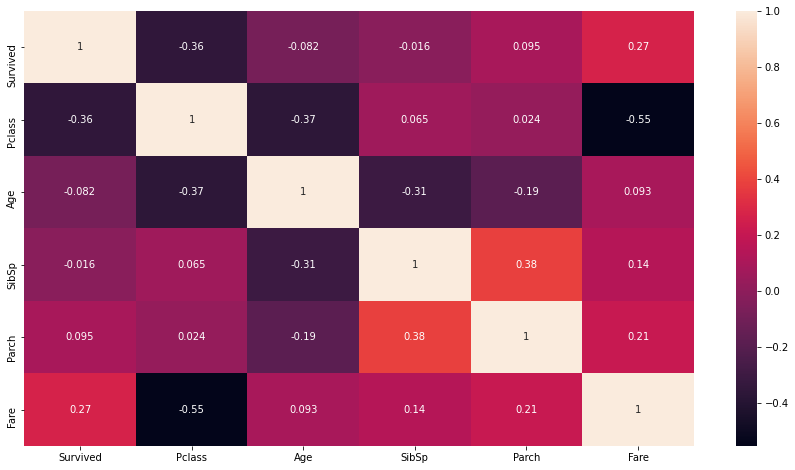

In [16]:
# use the heatmap to see the correlation 
# Lighter colorts indicate positive correlation and darker colors nagative correlation
# we can see Fare nagatively correlated with Pclass (Pclass if higher numerically would have lower Fare) 
fig,ax=plt.subplots(figsize=(15,8))
sns.heatmap(data_corr,annot=True) #annot=True mean use the raw correlation numbers

## Preprocessing the Data
### will convert any categorical column to integer values

In [17]:
# The label encoder is typically used with ordinal data i.e. data that has an inderent order
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data['Sex']= le.fit_transform(data['Sex'].astype(str))
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [18]:
# to check how label encoding is done ( Female=0 and Male=1)
le.classes_

array(['female', 'male'], dtype=object)

In [19]:
# Below the other way to encode categorical values using one-hot encoding (get_dummies)
data=pd.get_dummies(data,columns=['Embarked'])
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


## Shuffle the records using sample in the dataset and save it to CSV file and drop the original index

In [20]:
# When building ML model it is important that your training data be fed in a suffled form.
# shuffiling your training data ensures that your ML model doesn't inadvertently which mean 
# without intention or accidentally pickup patterns in the ordering of your dataset

# frac=1 returns all of the original records, because we want save the entire dataset to CSV file  
# reset_index(drop=Ture) will reset the indices of the records and will drop the original indices that will drop=Ture
# drop=True drop the original index
data=data.sample(frac=1).reset_index(drop=True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,2,1,18.0,0,0,13.0000,0,0,1
1,0,3,1,16.0,0,0,9.2167,0,0,1
2,1,3,0,15.0,1,0,14.4542,1,0,0
3,0,3,1,14.0,4,1,39.6875,0,0,1
4,0,3,1,28.0,2,0,7.9250,0,0,1


In [21]:
# save dataset to CSV file
data.to_csv('titanic_processed.csv',index=False)

## Now our data is processed we are ready to use it go to next file 003 BinaryClassification LogisticRegression Titanic